In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
# define objective function
def f(x):
    x1 = x[0]
    x2 = x[1]
    obj = 0.2 + x1**2 + x2**2 - 0.1*math.cos(6.0*3.1415*x1) - 0.1*math.cos(6.0*3.1415*x2)
    return obj


In [3]:
# Design variables at mesh points
i1 = np.arange(-1.0, 1.0, 0.01)
i2 = np.arange(-1.0, 1.0, 0.01)
x1m, x2m = np.meshgrid(i1, i2)
fm = np.zeros(x1m.shape)
for i in range(x1m.shape[0]):
    for j in range(x1m.shape[1]):
        fm[i][j] = 0.2 + x1m[i][j]**2 + x2m[i][j]**2 \
             - 0.1*math.cos(6.0*3.1415*x1m[i][j]) \
             - 0.1*math.cos(6.0*3.1415*x2m[i][j])

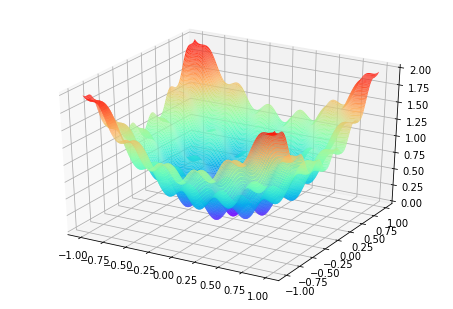

In [4]:
###plot 3D surface of function f(x1,x2)
figure = plt.figure()
ax = Axes3D(figure)
ax.plot_surface(x1m, x2m, fm, rstride=1, cstride=1, cmap='rainbow')
plt.show()

Cycle: 0 with Temperature: 2.80367325206
Cycle: 1 with Temperature: 2.63912997337
Cycle: 2 with Temperature: 2.48424348708
Cycle: 3 with Temperature: 2.33844705088
Cycle: 4 with Temperature: 2.20120718367
Cycle: 5 with Temperature: 2.07202171357
Cycle: 6 with Temperature: 1.95041794037
Cycle: 7 with Temperature: 1.83595090592
Cycle: 8 with Temperature: 1.72820176599
Cycle: 9 with Temperature: 1.62677625765
Cycle: 10 with Temperature: 1.53130325667
Cycle: 11 with Temperature: 1.44143341954
Cycle: 12 with Temperature: 1.35683790518
Cycle: 13 with Temperature: 1.27720717167
Cycle: 14 with Temperature: 1.20224984366
Cycle: 15 with Temperature: 1.13169164615
Cycle: 16 with Temperature: 1.06527440092
Cycle: 17 with Temperature: 1.00275508184
Cycle: 18 with Temperature: 0.943904925617
Cycle: 19 with Temperature: 0.888508594708
Cycle: 20 with Temperature: 0.83636338941
Cycle: 21 with Temperature: 0.787278506152
Cycle: 22 with Temperature: 0.741074339333
Cycle: 23 with Temperature: 0.6975818241

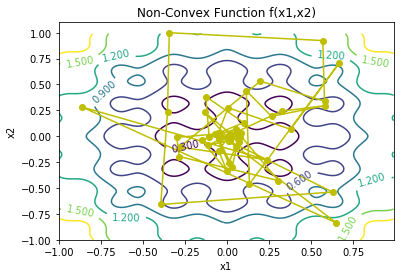

In [5]:
# Create a contour plot
plt.figure()
# Specify contour lines
#lines = range(2,52,2)
# Plot contours
CS = plt.contour(x1m, x2m, fm)#,lines)
# Label contours
plt.clabel(CS, inline=1, fontsize=10)
# Add some text to the plot
plt.title('Non-Convex Function f(x1,x2)')
plt.xlabel('x1')
plt.ylabel('x2')

##################################################
# Simulated Annealing
##################################################
# Start location
x_start = [0.8, -0.5]
# Number of cycles
n = 50
# Number of trials per cycle
m = 50
# Number of accepted solutions
na = 0.0
# Probability of accepting worse solution at the start
p1 = 0.7
# Probability of accepting worse solution at the end
p50 = 0.001
# Initial temperature
t1 = -1.0/math.log(p1)
# Final temperature
t50 = -1.0/math.log(p50)
# Fractional reduction every cycle
frac = (t50/t1)**(1.0/(n-1.0))
# Initialize x
x = np.zeros((n+1,2))
x[0] = x_start
xi = np.zeros(2)
xi = x_start
na = na + 1.0
# Current best results so far
xc = np.zeros(2)
xc = x[0]
fc = f(xi)
fs = np.zeros(n+1)
fs[0] = fc
# Current temperature
t = t1
# DeltaE Average
DeltaE_avg = 0.0
for i in range(n):
    print('Cycle: ' + str(i) + ' with Temperature: ' + str(t))
    for j in range(m):
        # Generate new trial points
        xi[0] = xc[0] + random.random() - 0.5
        xi[1] = xc[1] + random.random() - 0.5
        # Clip to upper and lower bounds
        xi[0] = max(min(xi[0],1.0),-1.0)
        xi[1] = max(min(xi[1],1.0),-1.0)
        DeltaE = abs(f(xi)-fc)
        if (f(xi)>fc):
            # Initialize DeltaE_avg if a worse solution was found
            #   on the first iteration
            if (i==0 and j==0): DeltaE_avg = DeltaE
            # objective function is worse
            # generate probability of acceptance
            p = math.exp(-DeltaE/(DeltaE_avg * t))
            # determine whether to accept worse point
            if (random.random()<p):
                # accept the worse solution
                accept = True
            else:
                # don't accept the worse solution
                accept = False
        else:
            # objective function is lower, automatically accept
            accept = True
        if (accept==True):
            # update currently accepted solution
            xc[0] = xi[0]
            xc[1] = xi[1]
            fc = f(xc)
            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na-1.0) +  DeltaE) / na
    # Record the best x values at the end of every cycle
    x[i+1][0] = xc[0]
    x[i+1][1] = xc[1]
    fs[i+1] = fc
    # Lower the temperature for next cycle
    t = frac * t

# print solution
print('Best solution: ' + str(xc))
print('Best objective: ' + str(fc))

plt.plot(x[:,0],x[:,1],'y-o')
plt.savefig('contour.png')
plt.show()

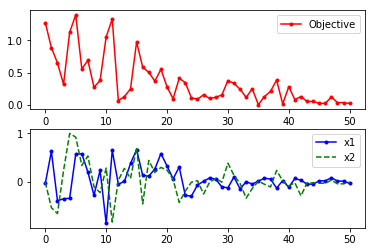

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(fs,'r.-')
ax1.legend(['Objective'])
ax2 = fig.add_subplot(212)
ax2.plot(x[:,0],'b.-')
ax2.plot(x[:,1],'g--')
ax2.legend(['x1','x2'])

# Save the figure as a PNG
plt.savefig('iterations.png')

plt.show()